In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
superstore = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
superstore['Total'] = superstore['Sales']*superstore['Quantity']

In [5]:
superstore['Order Date'] = pd.to_datetime(superstore['Order Date']) #change Dtype of Order Date
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date']) #change Dtype of Ship Date

In [6]:
superstore['Year'] = superstore['Order Date'].dt.year #make new columns that contains only year for 'Order Date'
superstore['Month'] = superstore['Order Date'].dt.month #make new columns that contains only month for 'Order Date'

## Find Out Purchase Frequencies by Date

##### found out purchase trend each month every year 

In [12]:
ssd = superstore[['Order ID','Order Date','Year','Month','Customer ID','Category','Sub-Category','Segment','Quantity','Total']]
#make new table with selected columns from superstore

In [14]:
ssd.groupby(['Year','Customer ID'])['Order ID'].count()

Year  Customer ID
2014  AA-10315       4
      AA-10375       2
      AA-10480       1
      AA-10645       6
      AB-10015       4
                    ..
2017  XP-21865       6
      YC-21895       1
      YS-21880       7
      ZC-21910       8
      ZD-21925       1
Name: Order ID, Length: 2499, dtype: int64

In [15]:
ssd.groupby(['Year','Category']).agg({'Quantity':'sum', 'Total':'sum'}) #check every category profit per year

Quantity         Total
Year Category                               
2014 Furniture            1623  8.544589e+05
     Office Supplies      4569  7.367882e+05
     Technology           1389  8.770366e+05
2015 Furniture            1775  9.492145e+05
     Office Supplies      4715  6.580623e+05
     Technology           1489  7.776245e+05
2016 Furniture            2193  9.817998e+05
     Office Supplies      5946  9.227923e+05
     Technology           1698  1.145465e+06
2017 Furniture            2437  1.073742e+06
     Office Supplies      7676  1.230942e+06
     Technology           2363  1.280135e+06

In [16]:
ssd.groupby(['Year'])['Order ID'].count() #see total order made every year

Year
2014    1993
2015    2102
2016    2587
2017    3312
Name: Order ID, dtype: int64

In [17]:
#make new table based on year to be plotted
ssd14 = ssd[ssd['Year'] == 2014]
ssd15 = ssd[ssd['Year'] == 2015]
ssd16 = ssd[ssd['Year'] == 2016]
ssd17 = ssd[ssd['Year'] == 2017]

In [18]:
#showing the quantity of each sub-category every month in 2014
pt14 = ssd14.pivot_table(index=['Category', 'Sub-Category'], columns='Month', aggfunc='sum')
pt14 = pt14[['Quantity']]
pt14

Quantity                                       \
Month                              1     2     3     4     5     6      7    
Category        Sub-Category                                                 
Furniture       Bookcases        16.0   NaN  17.0   3.0   9.0   9.0    9.0   
                Chairs           18.0   3.0  54.0  19.0  33.0  38.0   36.0   
                Furnishings      33.0  14.0  32.0  36.0  37.0  39.0   55.0   
                Tables            3.0   6.0  28.0  23.0  18.0  36.0   14.0   
Office Supplies Appliances        8.0   4.0  13.0  10.0  26.0  30.0    8.0   
                Art              32.0  18.0  72.0  64.0  47.0  81.0   40.0   
                Binders          42.0  37.0  87.0  79.0  92.0  75.0  104.0   
                Envelopes        13.0   NaN  10.0  13.0   9.0  13.0   12.0   
                Fasteners         7.0   5.0  14.0  28.0   8.0  12.0   10.0   
                Labels            7.0  10.0  28.0  17.0  17.0  19.0   21.0   
                Paper            32.0  19.0  92.0  63.0  50.0  53.0   65.0   
                Storage          28.0   8.0  52.0  65.0  19.0  34.0   59.0   
                Supplies          NaN   2.0   2.0   6.0  13.0   5.0   14.0   
Technology      Accessories      14.0  22.0  31.0  42.0  24.0  19.0   58.0   
                Copiers           NaN   NaN   NaN   NaN  10.0   NaN    1.0   
                Machines          NaN   NaN  16.0   4.0   NaN   8.0    NaN   
                Phones           31.0  11.0  37.0  64.0  54.0  50.0   44.0   

                                                                
Month                            8      9     10     11     12  
Category        Sub-Category                                    
Furniture       Bookcases      13.0   15.0   6.0   39.0   17.0  
                Chairs         31.0   69.0  49.0   57.0  133.0  
                Furnishings    47.0   90.0  50.0  104.0  123.0  
                Tables         16.0   34.0  25.0   28.0   39.0  
Office Supplies Appliances     29.0   70.0  17.0   41.0   58.0  
                Art            30.0   72.0  33.0   64.0   60.0  
                Binders       101.0  123.0  68.0  157.0  124.0  
                Envelopes      13.0   29.0  28.0   48.0   18.0  
                Fasteners      28.0   34.0  16.0   21.0   18.0  
                Labels         12.0   57.0  18.0   68.0   52.0  
                Paper         109.0  138.0  64.0  204.0  128.0  
                Storage        33.0   92.0  80.0  103.0  100.0  
                Supplies       21.0    9.0   8.0   35.0   15.0  
Technology      Accessories    69.0   78.0  48.0   80.0   95.0  
                Copiers         4.0    3.0   5.0    NaN    6.0  
                Machines        NaN   45.0   2.0   11.0   10.0  
                Phones         53.0   42.0  56.0  159.0   83.0

In [19]:
#seeing the maximum number of Quantity order by each month in 2014
pt14 = pt14[pt14['Quantity']==pt14['Quantity'].max()]
pt14 = pt14.dropna(how='all')
pt14.style.applymap(lambda x: "background-color: pink" if x>0 else "background-color : white")

In [20]:
#seeing the maximum number of Quantity order by each month in 2015
pt15 = ssd15.pivot_table(index=['Category', 'Sub-Category'], columns='Month', aggfunc='sum')
pt15 = pt15[['Quantity']]
pt15 = pt15[pt15['Quantity']==pt15['Quantity'].max()]
pt15 = pt15.dropna(how='all')
pt15.style.applymap(lambda x: "background-color: lime" if x>0 else "background-color : white")

In [21]:
#seeing the maximum number of Quantity order by each month in 2016
pt16 = ssd16.pivot_table(index=['Category', 'Sub-Category'], columns='Month', aggfunc='sum')
pt16 = pt16[['Quantity']]
pt16 = pt16[pt16['Quantity']==pt16['Quantity'].max()]
pt16 = pt16.dropna(how='all')
pt16.style.applymap(lambda x: "background-color: cyan" if x>0 else "background-color : white")

In [22]:
#seeing the maximum number of Quantity order by each month in 2017
pt17 = ssd17.pivot_table(index=['Category', 'Sub-Category'], columns='Month', aggfunc='sum')
pt17 = pt17[['Quantity']]
pt17 = pt17[pt17['Quantity']==pt17['Quantity'].max()]
pt17 = pt17.dropna(how='all')
pt17.style.applymap(lambda x: "background-color: orange" if x>0 else "background-color : white")

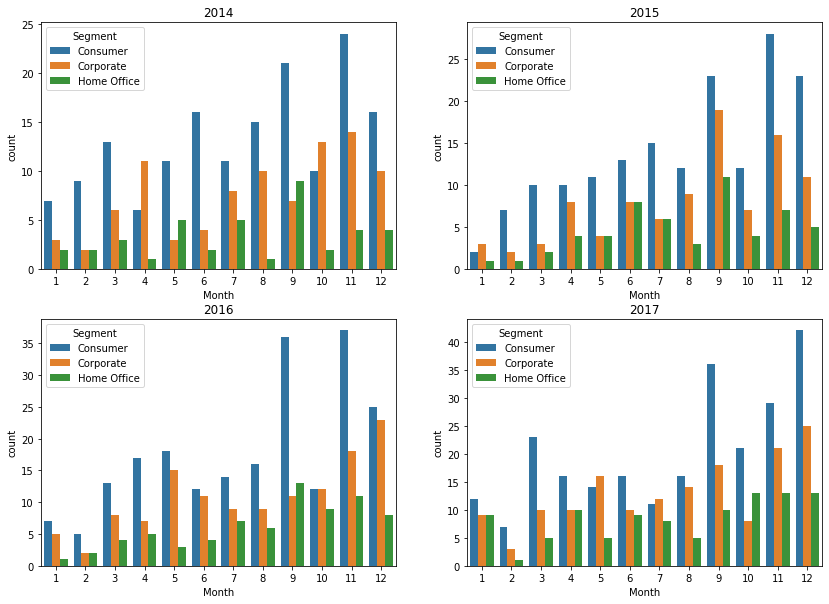

In [38]:
b14 = ssd14[ssd14['Sub-Category']=='Binders']
b15 = ssd15[ssd15['Sub-Category']=='Binders']
b16 = ssd16[ssd16['Sub-Category']=='Binders']
b17 = ssd17[ssd17['Sub-Category']=='Binders']



#Seeing buyer of binder for each month in 2014-2017
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.countplot(ax=ax[0,0], x='Month', data=b14,hue='Segment',hue_order=['Consumer','Corporate','Home Office']);
ax[0,0].set_title('2014');
sns.countplot(ax=ax[0,1], x='Month', data=b15,hue='Segment',hue_order=['Consumer','Corporate','Home Office']);
ax[0,1].set_title('2015');
sns.countplot(ax=ax[1,0], x='Month', data=b16,hue='Segment',hue_order=['Consumer','Corporate','Home Office']);
ax[1,0].set_title('2016');
sns.countplot(ax=ax[1,1], x='Month', data=b17,hue='Segment',hue_order=['Consumer','Corporate','Home Office']);
ax[1,1].set_title('2017');

We Can see from data above, that 'Office Supplies' category is needed in the most month every year since 2014 by 'Consumer' segment, especially for  the 'Binders'

# Ship Mode

In [41]:
sss = superstore[['Segment','Order Date','Year','Month','Ship Date','Ship Mode','Region','City']]

In [42]:
sss['Range'] = sss['Ship Date']-sss['Order Date']
sss['Range'] = sss['Range'].astype('str')

C:\Users\julda\AppData\Local\Temp/ipykernel_14036/4210360161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sss['Range'] = sss['Ship Date']-sss['Order Date']
C:\Users\julda\AppData\Local\Temp/ipykernel_14036/4210360161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sss['Range'] = sss['Range'].astype('str')


for example : \
the company has its regulation for their ship mode, default shipping for 
- same day start in the same day
- first class start in tomorrow and the day after tomorrow
- second class start in 2-3 days after order
- standard class start in 3-5 days after tomorrow

In [43]:
def panc(x):
   
    if x['Ship Mode'] == 'Same Day':
        if x['Range'] == '0 days':
            return 'On Time'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'First Class':
        if x['Range'] in ['1 days', '2 days'] :
            return 'On Time'
        elif x['Range']=='0 days':
            return 'Early'
        else:
            return 'Late'
    elif x['Ship Mode']=='Second Class':
        if x['Range'] in ['2 days','3 days']:
            return 'On Time'
        elif x['Range'] in ['0 days','1 days']:
            return 'Early'
        else:
            return'Late'
    else:
        if x['Range'] in ['3 days','4 days','5 days']:
            return 'On Time'
        elif x['Range'] in ['0 days','1 days','2 days']:
            return 'Early'
        else:
            return 'Late'

In [44]:
#make a new column to see the panctuality of shipping date: start shipping date from order date.
sss['Panctuality'] = sss.apply(lambda x: panc(x), axis=1)
sss

C:\Users\julda\AppData\Local\Temp/ipykernel_14036/3118816224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sss['Panctuality'] = sss.apply(lambda x: panc(x), axis=1)


,Segment,Order Date,Year,Month,Ship Date,Ship Mode,Region,City,Range,Panctuality
0,Consumer,2016-11-08,2016,11,2016-11-11,Second Class,South,Henderson,3 days,On Time
1,Consumer,2016-11-08,2016,11,2016-11-11,Second Class,South,Henderson,3 days,On Time
2,Corporate,2016-06-12,2016,6,2016-06-16,Second Class,West,Los Angeles,4 days,Late
3,Consumer,2015-10-11,2015,10,2015-10-18,Standard Class,South,Fort Lauderdale,7 days,Late
4,Consumer,2015-10-11,2015,10,2015-10-18,Standard Class,South,Fort Lauderdale,7 days,Late
...,...,...,...,...,...,...,...,...,...,...
9989,Consumer,2014-01-21,2014,1,2014-01-23,Second Class,South,Miami,2 days,On Time
9990,Consumer,2017-02-26,2017,2,2017-03-03,Standard Class,West,Costa Mesa,5 days,On Time
9991,Consumer,2017-02-26,2017,2,2017-03-03,Standard Class,West,Costa Mesa,5 days,On Time
9992,Consumer,2017-02-26,2017,2,2017-03-03,Standard Class,West,Costa Mesa,5 days,On Time


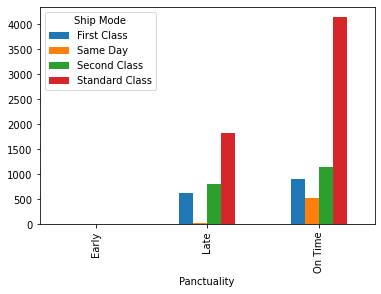

In [45]:
#show data Panctuality in every ship mode
sss.pivot_table(index='Panctuality', columns='Ship Mode', values='Range', aggfunc='count').plot(kind='bar');

In [134]:
sss.groupby(['Region'])['Panctuality'].count()

Region
Central    2323
East       2848
South      1620
West       3203
Name: Panctuality, dtype: int64

Text(409, -0.04, '818')

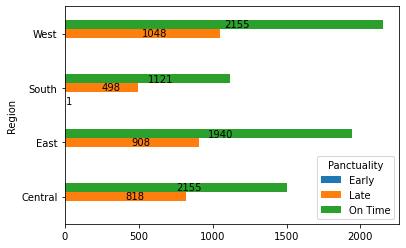

In [133]:
#Show data Panctuality for every region
sss.pivot_table(columns='Panctuality', index='Region', values='Range', aggfunc='count').plot(kind='barh');
plt.text(1077.5, 3.12, s='2155')
plt.text(524, 2.95, s='1048')
plt.text(560.5, 2.1, s='1121')
plt.text(250, 1.95, s='498')
plt.text(10, 1.7, s='1')
plt.text(970, 1.1, s='1940')
plt.text(454, 0.95, s='908')
plt.text(752.5, 0.12, s='2155')
plt.text(409, -0.04, s='818')

In [47]:
sss14 = sss[sss['Year']==2014]
sss15 = sss[sss['Year']==2015]
sss16 = sss[sss['Year']==2016]
sss17 = sss[sss['Year']==2017]

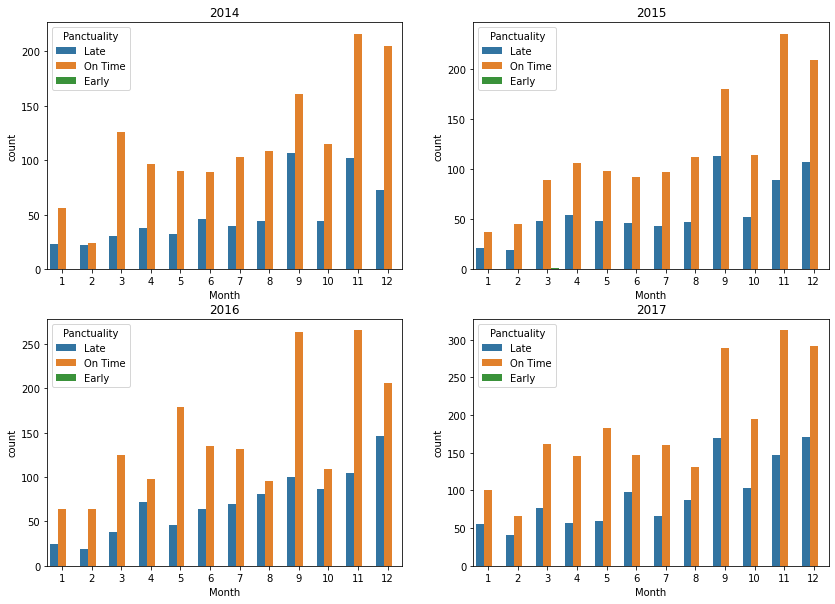

In [48]:
#Show much order every month, group by Panctuality
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.countplot(ax=ax[0,0], x='Month', data=sss14,hue='Panctuality',hue_order = ['Late', 'On Time', 'Early']);
ax[0,0].set_title('2014');
sns.countplot(ax=ax[0,1], x='Month', data=sss15,hue='Panctuality',hue_order = ['Late', 'On Time', 'Early']);
ax[0,1].set_title('2015');
sns.countplot(ax=ax[1,0], x='Month', data=sss16,hue='Panctuality',hue_order = ['Late', 'On Time', 'Early']);
ax[1,0].set_title('2016');
sns.countplot(ax=ax[1,1], x='Month', data=sss17,hue='Panctuality',hue_order = ['Late', 'On Time', 'Early']);
ax[1,1].set_title('2017');

Based on data above, we can see that region 'Central' has the most late in percent of total shipping, with 35,2% late shipping. Also we can see that many of our customer using standar class which has low percentage late shipping, but for first class and second class, the differences of 'On Time' and 'Late' shipping is small, if continued like this it will drop customers' level of confidence for using those classes.

we also can see the rise tendency of late shipping in the end of year(which start from ninth month until twelfth) along with the increase of order. 

# Find out the frequency of each segment for every month in 2014-2017

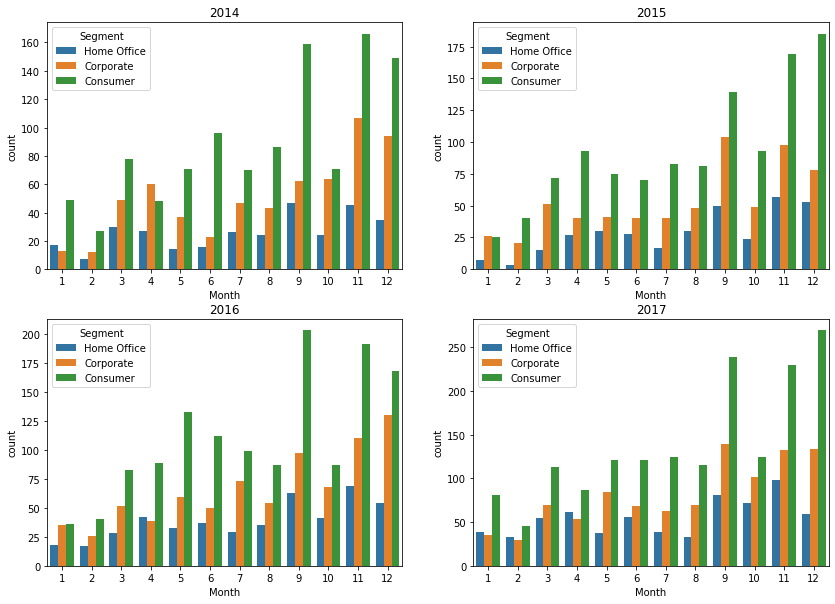

In [135]:
fig, ax = plt.subplots(2,2,figsize=(14,10))
sns.countplot(ax=ax[0,0], x='Month', data=sss14,hue='Segment', hue_order=['Home Office','Corporate','Consumer']);
ax[0,0].set_title('2014');
sns.countplot(ax=ax[0,1], x='Month', data=sss15,hue='Segment', hue_order=['Home Office','Corporate','Consumer']);
ax[0,1].set_title('2015');
sns.countplot(ax=ax[1,0], x='Month', data=sss16,hue='Segment', hue_order=['Home Office','Corporate','Consumer']);
ax[1,0].set_title('2016');
sns.countplot(ax=ax[1,1], x='Month', data=sss17,hue='Segment', hue_order=['Home Office','Corporate','Consumer']);
ax[1,1].set_title('2017');